In [312]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


In [313]:
data = pd.read_csv('meatspec.csv')
data = data.drop('Unnamed: 0', axis=1)

In [314]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,3.14626,3.15166,3.15703,3.16244,3.16791,3.17348,3.17923,3.18521,3.19140,3.19792,...,3.61483,3.59695,3.57915,3.56142,3.54365,3.52563,3.50705,3.48765,3.46769,31.3
211,2.57992,2.58040,2.58099,2.58175,2.58266,2.58381,2.58530,2.58719,2.58949,2.59225,...,2.95464,2.93756,2.92062,2.90367,2.88668,2.86951,2.85180,2.83347,2.81473,33.8
212,2.56875,2.56923,2.56985,2.57060,2.57150,2.57268,2.57420,2.57610,2.57841,2.58129,...,2.94870,2.93226,2.91592,2.89952,2.88291,2.86595,2.84836,2.82998,2.81111,35.5
213,2.65884,2.65943,2.66023,2.66108,2.66215,2.66360,2.66550,2.66787,2.67070,2.67405,...,3.04851,3.03351,3.01851,3.00327,2.98759,2.97121,2.95374,2.93514,2.91564,42.5


In [315]:
#correlation_matrix = data.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Matriz de Correlación')
#plt.show()

In [316]:
X = data.drop('fat', axis=1)
y = data['fat']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [318]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [319]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


In [320]:
r2

0.9512365006149384

In [321]:
pca = make_pipeline(StandardScaler(), PCA())
pca.fit(X)
modelo_pca = pca.named_steps['pca']

In [322]:
components = modelo_pca.components_

In [323]:
pd.DataFrame(
    data    = components,
    columns = X.columns,

)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,0.099662,0.099660,0.099658,0.099655,0.099652,0.099649,0.099649,0.099650,0.099654,0.099661,...,0.099903,0.099866,0.099825,0.099781,0.099736,0.099692,0.099649,0.099610,0.099575,0.099542
1,-0.130473,-0.131376,-0.132246,-0.133077,-0.133839,-0.134496,-0.135008,-0.135346,-0.135525,-0.135544,...,0.103387,0.102354,0.101376,0.100407,0.099443,0.098425,0.097306,0.095995,0.094484,0.092877
2,0.091773,0.088835,0.085916,0.082999,0.080049,0.077022,0.073884,0.070622,0.067203,0.063653,...,-0.120510,-0.132058,-0.143451,-0.154369,-0.164514,-0.173720,-0.181717,-0.188321,-0.193488,-0.197425
3,0.081745,0.087658,0.093085,0.097996,0.102320,0.105992,0.108942,0.111144,0.112565,0.113098,...,0.103797,0.108640,0.113243,0.118060,0.123425,0.129651,0.137130,0.146260,0.157093,0.169245
4,0.322543,0.284478,0.247829,0.212456,0.178412,0.145839,0.114908,0.085779,0.058323,0.032950,...,-0.004320,-0.010769,-0.016609,-0.022663,-0.029550,-0.037592,-0.047737,-0.060764,-0.077177,-0.096295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.000855,0.016802,-0.068167,0.162478,-0.220993,0.183204,-0.094249,0.026712,-0.024250,0.015973,...,-0.245253,0.136117,0.011654,-0.058997,0.034384,0.026421,-0.041338,0.006459,0.017817,-0.012001
96,-0.001516,0.007271,-0.030710,0.073626,-0.110420,0.125725,-0.077097,0.021006,-0.025159,0.049723,...,-0.097057,0.056987,0.016712,-0.005449,-0.039271,0.027989,-0.010332,-0.010638,0.019297,-0.007313
97,-0.006166,-0.011474,0.063078,-0.132402,0.183946,-0.148070,0.092894,-0.038315,-0.003409,-0.019647,...,0.051988,-0.053630,0.044805,-0.028915,0.007102,0.007566,0.003935,-0.014736,0.005292,-0.000175
98,-0.010784,0.014416,-0.022621,0.039888,-0.014335,0.000493,-0.001239,0.002295,0.003774,-0.044533,...,0.041753,-0.028416,-0.012791,0.022113,-0.001811,-0.023838,0.027265,0.003771,-0.030177,0.016649


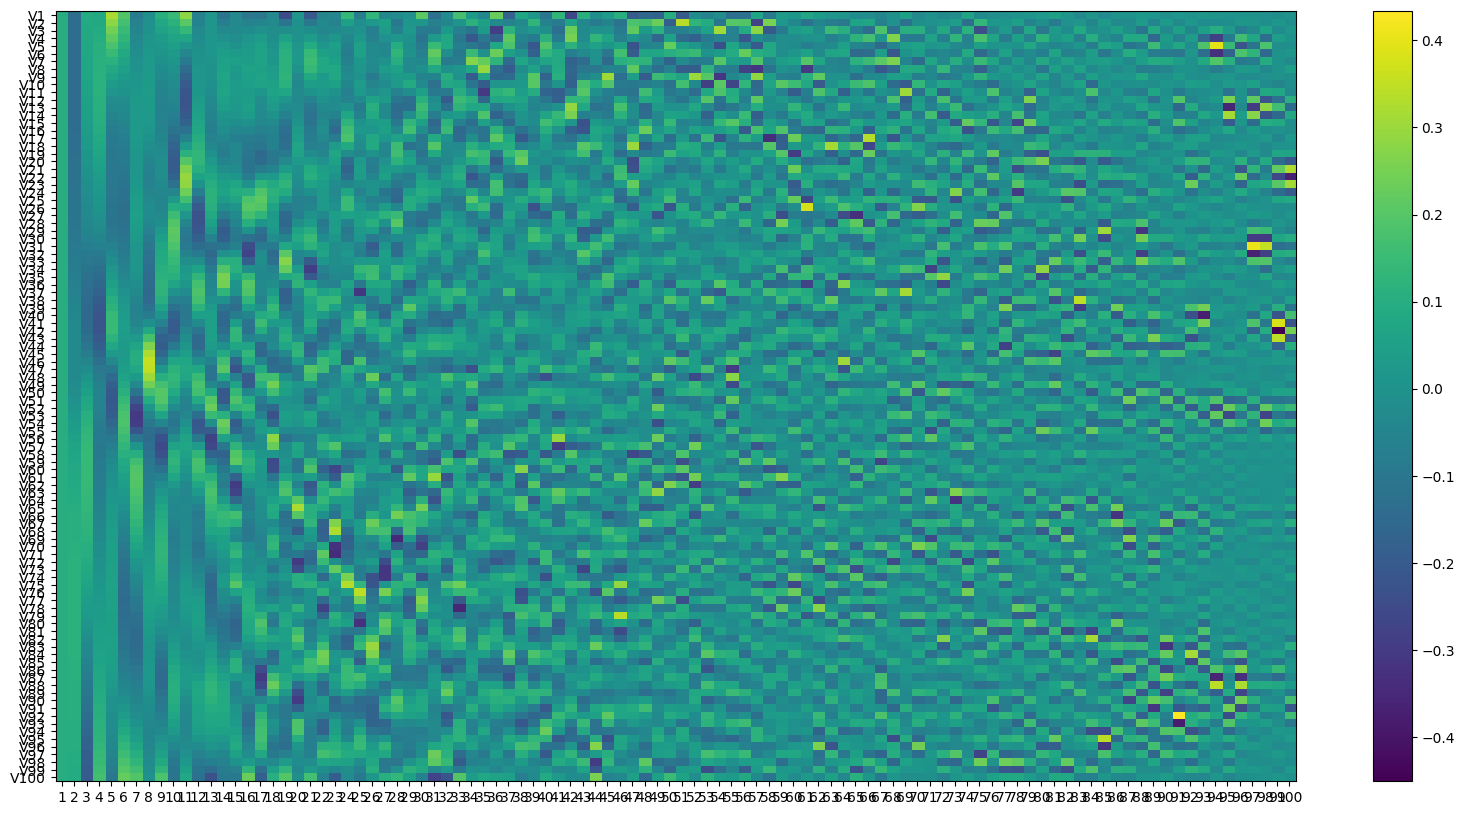

In [324]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

[0.986262, 0.009697, 0.002793, 0.001144, 6.5e-05, 2.6e-05, 7e-06, 4e-06, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


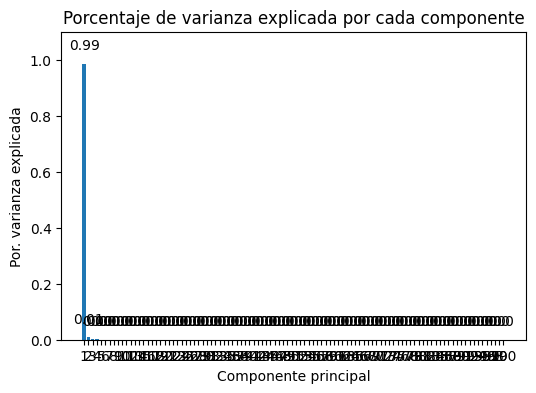

In [325]:
rounded_variance_ratio = [round(var, 6) for var in modelo_pca.explained_variance_ratio_]
print(rounded_variance_ratio)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.98626193 0.99595898 0.99875222 0.99989652 0.99996113 0.99998737
 0.99999456 0.99999841 0.99999914 0.99999959 0.99999979 0.9999999
 0.99999994 0.99999996 0.99999997 0.99999997 0.99999998 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        

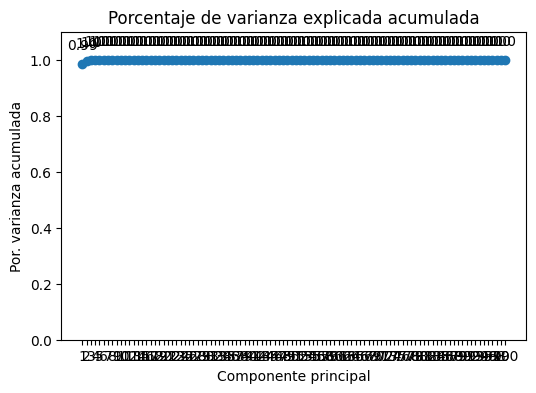

In [326]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [327]:
X = data[['V1', 'V2']]
y = data['fat']

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [329]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [330]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [331]:
r2

0.21089729867761664